In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

#Pass all of the data, both test and train, into our cleaning function.
#Leave Id and SalePrice out because we don't want our model to predict from these.
all_df = pd.concat((train_df.drop(['Id', 'SalePrice'], axis=1),
                      test_df.drop('Id', axis=1)))

In [3]:
def clean_data(df):
    numeric_vars = df.select_dtypes(['float64', 'int64']).columns
    data_numeric = df[numeric_vars]
    
    data_cat = df.select_dtypes(['object'])
    
    result_df = pd.concat([pd.get_dummies(data_cat),data_numeric], axis=1)
    return result_df.fillna(result_df.mean())

In [4]:
data_all = clean_data(all_df)

In [5]:
data_all.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,0,0,1,0,0,1,0,0,0,...,548.0,0,61,0,0,0,0,0,2,2008
1,0,0,0,1,0,0,1,0,0,0,...,460.0,298,0,0,0,0,0,0,5,2007
2,0,0,0,1,0,0,1,0,0,1,...,608.0,0,42,0,0,0,0,0,9,2008
3,0,0,0,1,0,0,1,0,0,1,...,642.0,0,35,272,0,0,0,0,2,2006
4,0,0,0,1,0,0,1,0,0,1,...,836.0,192,84,0,0,0,0,0,12,2008


In [6]:
#Recover which rows were test and which were train
train_data_all = data_all[:train_df.shape[0]]
test_data_all = data_all[train_df.shape[0]:]

In [7]:
X = train_data_all.values
y = train_df['SalePrice'].values

In [8]:
def get_mse(X, y, a):
    x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.33, random_state = 37)


    regr = linear_model.Ridge(alpha = a, normalize=True)
    regr.fit(x_train, y_train)
    return np.sqrt(np.mean((np.log(regr.predict(x_validation) )- np.log(y_validation))** 2))

In [9]:
alpha_optimization_df = pd.DataFrame({'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5,2, 3, 4, 5, 10, 100]})
alpha_optimization_df['mse'] = alpha_optimization_df['alpha'].apply(lambda a: get_mse(X, y, a))
alpha_optimization_df.head()

,alpha,mse
0,0.1,0.155026
1,0.2,0.151289
2,0.3,0.149290
3,0.4,0.148165
4,0.5,0.147552


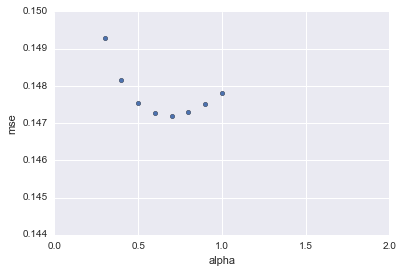

In [10]:
alpha_optimization_df.plot(x = 'alpha', y = 'mse', kind = 'scatter', xlim = [0, 2], ylim = [0.144, 0.15])

Looks like the best alpha is around 0.7.

In [11]:
x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.33, random_state = 37)

#regr = linear_model.LinearRegression()
regr = linear_model.Ridge(alpha = 0.7, normalize=True)
regr.fit(x_train, y_train)
#print('Coefficients: ', regr.coef_)
print('Intercept: ', regr.intercept_)
print("Root Mean squared error: %.3f" % np.sqrt(np.mean((np.log(regr.predict(x_validation) )- np.log(y_validation))** 2)))

('Intercept: ', 67817.511738566332)
Root Mean squared error: 0.147


## Create the Test Set for Upload

In [12]:
X_test = test_data_all.values

In [13]:
preds = regr.predict(X_test)

In [14]:
solution = pd.DataFrame({"id":test_df.Id, "SalePrice":preds})
solution.to_csv("ridge_sol.csv", index = False)

In [15]:
solution.head()

,SalePrice,id
0,118665.016833,1461
1,159698.864004,1462
2,184127.613897,1463
3,199302.325651,1464
4,194868.073288,1465
